In [ ]:
#create segments of contractors based on activity and derive any interesting insights about these segments

In [22]:
%matplotlib inline

In [23]:
import matplotlib as plt
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('Player Details - SR.csv')

In [25]:
df.describe()

,Player Id,Earnings (INR),quality_score,is_banned,lives
count,54610.000000,54610.000000,54610.000000,54610,54610.000000
mean,31650.315968,309.058487,-0.378742,0,2.992987
std,19420.343191,2700.527072,1.084634,0,43.401818
min,67.000000,0.000000,-2.000000,False,0.000000
25%,14415.250000,5.000000,-1.000000,0,2.000000
50%,29949.500000,5.000000,0.000000,0,3.000000
75%,49399.750000,15.000000,0.057555,0,3.000000
max,64789.000000,153409.000000,2.000000,False,9959.000000


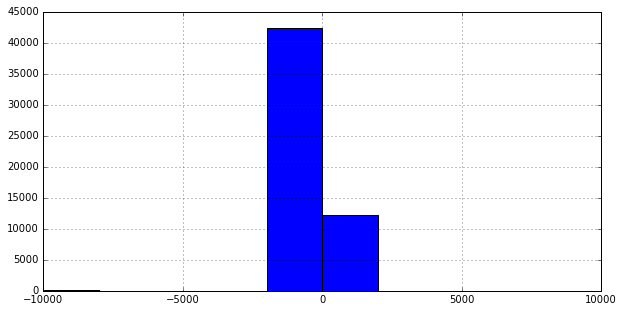

In [26]:
#plt.figure();
df['lives'].diff().hist(bins=10,figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D0F1F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DDF8390>]], dtype=object)

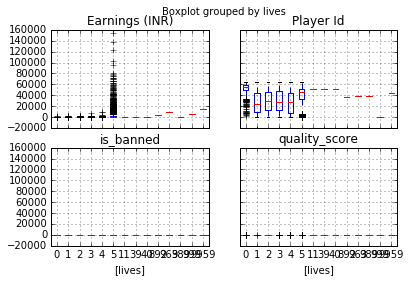

In [27]:
df.boxplot(by='lives')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DF810B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E9F6198>]], dtype=object)

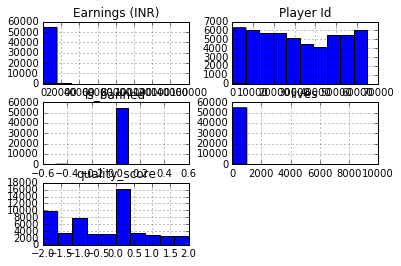

In [28]:
df.hist()

0        1140
1        5299
2       11387
3       30938
4         592
5        5244
11          1
39          1
40          3
892         1
963         1
989         1
999         1
9959        1
Name: lives, dtype: int64


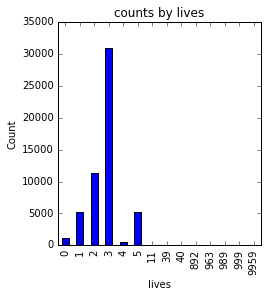

In [29]:
#list_lives = sort()
temp1 = df['lives'].value_counts().sort_index()
print temp1

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('lives')
ax1.set_ylabel('Count')
ax1.set_title("counts by lives")
temp1.plot(kind='bar')

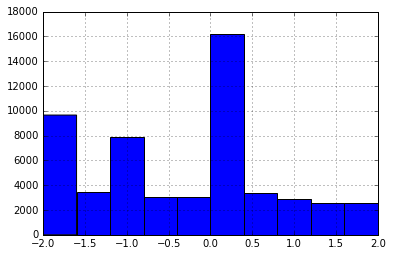

In [30]:
df['quality_score'].hist()

In [31]:
temp2 = df.pivot_table(values='quality_score',index=['lives'])
print temp2

lives
0      -0.439070
1      -0.927881
2      -0.997601
3      -0.333303
4       0.382251
5       1.175993
11      0.645161
39      1.980000
40      1.993367
892     1.202957
963     1.579778
989    -0.222222
999    -0.486567
9959    1.804266
Name: quality_score, dtype: float64


In [32]:
#table = pivot_table(df, values='D', index=['A', 'B'],columns=['C'], aggfunc=np.sum)
temp2 = df.pivot_table(values='Player Id',index=['lives','quality_score'],aggfunc=np.count_nonzero)
#print temp2

In [33]:
#Binning:
def binning(col, cut_points, labels):
  #Define min and max values:
    minval = col.min()
    maxval= col.max()

    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]
    #print len(break_points)

    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

#Binning age:
cut_points = [-1.5,-1,-0.5,0,0.5,1,1.5]
labels = ['<-1.5','-1.5< <-1','-1< <-0.5','-0.5< <0','0< <0.5','0.5< <1','1< <1.5','1.5<']
df["quality_score_Bin"] = binning(df["quality_score"], cut_points, labels)
#print df['quality_score_Bin']
quality_score_seg = pd.value_counts(df["quality_score_Bin"], sort=False)
#print quality_score_seg

In [34]:
temp2 = df.pivot_table(values='Player Id',index=['lives','quality_score_Bin'],aggfunc=np.count_nonzero)
print temp2

lives  quality_score_Bin
0      <-1.5                   51
       -1.5< <-1              145
       -1< <-0.5              312
       -0.5< <0               394
       0< <0.5                201
       0.5< <1                 37
       1< <1.5                NaN
       1.5<                   NaN
1      <-1.5                 1932
       -1.5< <-1              724
       -1< <-0.5              893
       -0.5< <0              1002
       0< <0.5                538
       0.5< <1                165
       1< <1.5                 42
       1.5<                     3
2      <-1.5                 4800
       -1.5< <-1             2015
       -1< <-0.5             1035
       -0.5< <0              1844
       0< <0.5               1004
       0.5< <1                596
       1< <1.5                 92
       1.5<                     1
3      <-1.5                 5068
       -1.5< <-1             5743
       -1< <-0.5              855
       -0.5< <0             13773
       0< <0.5         